# Author: Huram-Abi Nzia Yotchoum
## Week 12: Simulation
## Created on:  06 November 2020

 


In [19]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Die Object


In [3]:
class Die:
    def __init__(self, num_sides):
        self.sides = np.arange(1,num_sides+1,dtype = int)
        np.random.shuffle(self.sides)
        self.face = self.sides[0]
        
    def __str__(self):
        return(str(self.face))
        
    def __repr__(self):
        return(str(self.face))
        
    def roll(self):
        np.random.shuffle(self.sides)
        self.face = self.sides[0]
        return (self.face)
    
    def __gt__(self,other):
        if isinstance(other,Die):
            if self.face > other.face:
                return True
            else:
                return False
        else:
            try:
                if self.face > other:
                    return True
                else:
                    return False
            except:
                print("Cannot Perform Operation")
                
    def __ge__(self,other):
        if isinstance(other,Die):
            if self.face >= other.face:
                return True
            else:
                return False
        else:
            try:
                if self.face >= other:
                    return True
                else:
                    return False
            except:
                print("Cannot Perform Operation")

In [4]:
def Risk(N,attackdie, defenddie):
    results = np.zeros(N,dtype = int)
    for i in range(N):
        attacks=[]
        defend = []
        for k in range(attackdie):
            roll = Die(6)
            attacks.append(roll)
        if defenddie == 1:
            droll = Die(6)
            if droll >= max(attacks):
                results[i] = 1
            else:
                results[i] = -1
        if defenddie ==2:
            attacks.sort(reverse = True)
            defend.append(Die(6))
            defend.append(Die(6))
            defend.sort(reverse = True)
            if attackdie > 1:
                if defend[0]>=attacks[0] and defend[1]>=attacks[1]:
                    results[i] = 2
                elif defend[0]<attacks[0] and defend[1]<attacks[1]:
                    results[i] = -2
            elif attackdie == 1:
                if defend[0]>=attacks[0]:
                    results[i]=1
                elif defend[0]<attacks[0]:
                    results[i] = -1
    return(results)

In [5]:
def simulation(Iter=1000):
    attacker_str = {att_num : None  for att_num in range (5,32,5)}

    for att_num in attacker_str:
        Defender_Df = { def_num : [] for def_num in range(1,31)}

        for def_num in Defender_Df:

            for i in range(Iter):
                defend = def_num
                attack = att_num
                while defend > 0 and attack > 0:
                    if defend >=2 and attack >=3:
                        results = Risk(1,3, 2)
                    elif defend >=2 and attack <3:
                        results = Risk(1,attack, 2)
                    elif defend < 2 and attack >=3 :
                        results = Risk(1,3, defend)
                    elif defend < 2 and attack < 3:
                        results = Risk(1,attack, defend)
  
                    if results[0] == 0:
                        defend -= 1
                        attack -= 1
                    elif results[0] == 2:
                        attack -= 2
                    elif results[0] == -2:
                        defend -= 2
                    elif results[0] == 1:
                        attack -= 1
                    elif results[0] == -1:
                        defend -= 1
                    
                if defend <1 and attack>0 :
                    Defender_Df[def_num].append(1)
                else:
                    Defender_Df[def_num].append(0)

        attacker_str[att_num] = {key : sum(value)/len(value) for key , value in list(Defender_Df.items())}

    return attacker_str
sim = simulation()

In [10]:
sim2 = sim.copy()

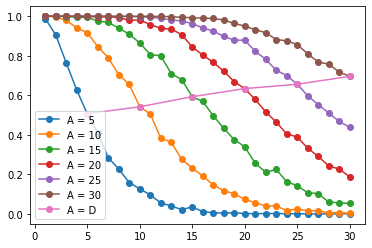

In [24]:
sim2 = {key : pd.Series(value) for key, value in list(sim.items())}
for key in sim2:
    plt.plot(sim2[key], "o-")

AD = {}
for Akey in sim2:
    for Dkey in sim[Akey]:
        if Akey == Dkey:
            AD[Akey] = sim[Akey][Dkey]
AD = pd.Series(AD)

plt.plot(AD,"o-")





plt.legend([f"A = {key}" for key in sim2] + ["A = D"])



In [ ]:
'''
Sir, I understand that I turned this assignment late. My intentions was not to blow off this assignment eventhough I turned it in late. The biggest hurdle for was trying to undestand the game. I then wanted to fully emulate the graph that was create in this paper https://www4.stat.ncsu.edu/~jaosborn/research/RISK.pdf 
I hope that you understand my ambition."